# House Price Prediction 

Dataset used : California Housing Prices

Dataset link : https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The description of the dataset is as follows:-

Longitude: A measure of how far west a house is.

Latitude: A measure of how far north a house is.

housingMedianAge: Median age of a house within a block where a lower number is a newer building.

totalRooms: Total number of rooms within a block.

totalBedrooms: Total number of bedrooms within a block

population: Total number of people residing within a block

households: Total number of households, a group of people residing within a home unit, for a block

medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

medianHouseValue: Median house value for households within a block (measured in US Dollars). Median House value is better than other averages as it is not influenced by extreme values.

oceanProximity: Location of the house w.r.t ocean/sea


In [4]:
#importing the data from California Housing dataset

data = pd.read_csv("housing.csv")
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# remove missing values

data.dropna(inplace=True)

In [6]:
# Checking for null values and data-types

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

# Train and Test dataset
X = data.drop(['median_house_value'], axis=1) #features
y = data['median_house_value']      #target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)
train_data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13927,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,INLAND,48100.0
7942,-118.13,33.87,45.0,1606.0,300.0,735.0,295.0,4.6765,<1H OCEAN,198400.0
20048,-119.02,36.05,22.0,2078.0,431.0,1336.0,456.0,2.2202,INLAND,65200.0
20196,-119.21,34.26,23.0,2887.0,540.0,1508.0,518.0,3.3452,NEAR OCEAN,217600.0
4910,-118.27,34.01,35.0,1193.0,355.0,1784.0,341.0,1.8652,<1H OCEAN,116100.0
...,...,...,...,...,...,...,...,...,...,...
19186,-122.66,38.46,14.0,2364.0,631.0,1300.0,625.0,2.6023,<1H OCEAN,221100.0
14663,-117.12,32.80,29.0,2863.0,534.0,1392.0,522.0,3.8719,NEAR OCEAN,174200.0
18209,-122.06,37.40,21.0,12855.0,3226.0,7273.0,3052.0,4.3351,NEAR BAY,267400.0
3160,-118.92,35.13,29.0,1297.0,262.0,909.0,253.0,1.9236,INLAND,106300.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

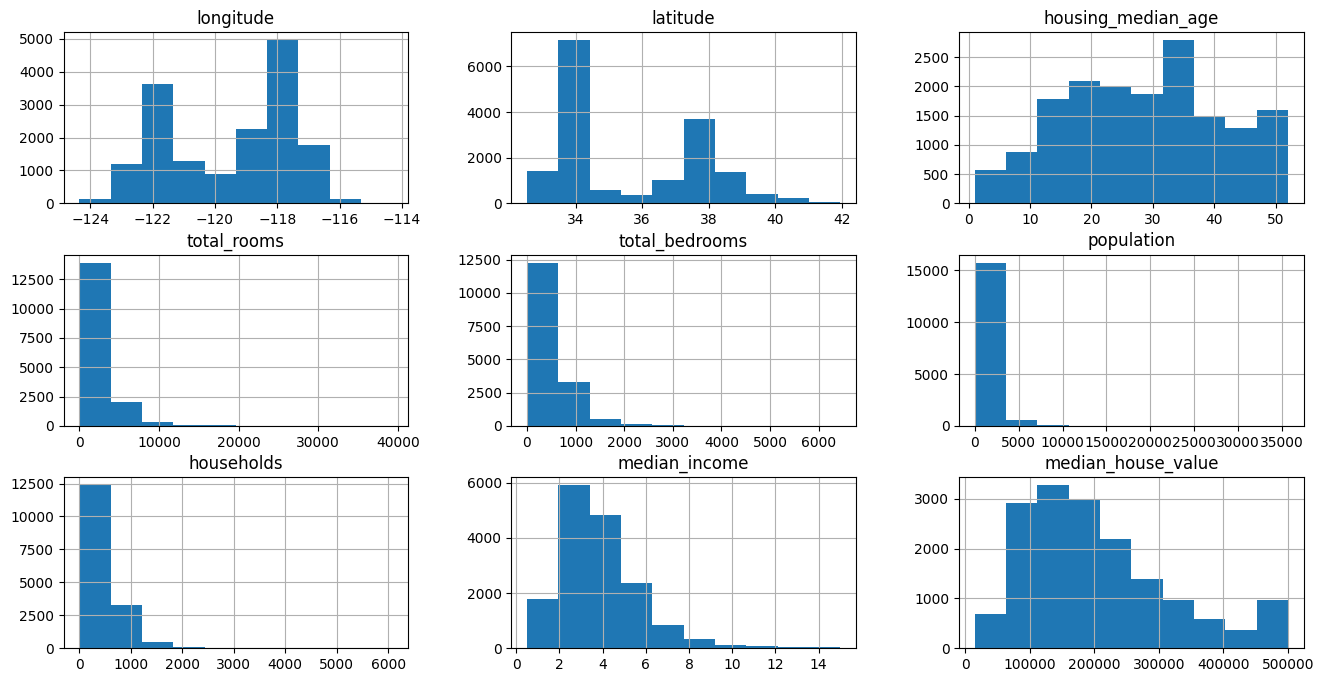

In [10]:
#returns a histogram

train_data.hist(figsize =(16,8))

C:\Users\vegra\AppData\Local\Temp\ipykernel_24040\773083927.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')


<AxesSubplot: >

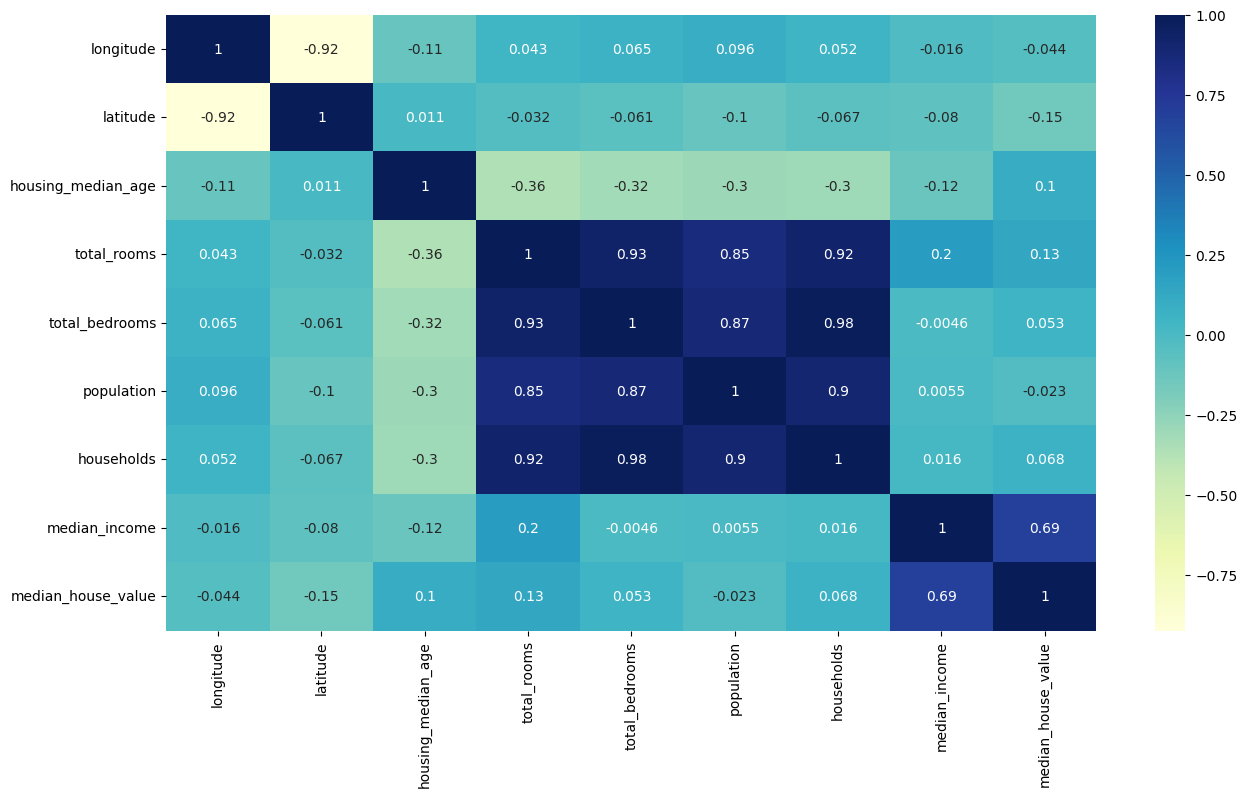

In [11]:
#returns a correlation heatmap

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

## Data Preprocessing


In [12]:
# Taking the log values of the features to get better visualisations than the former one.

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

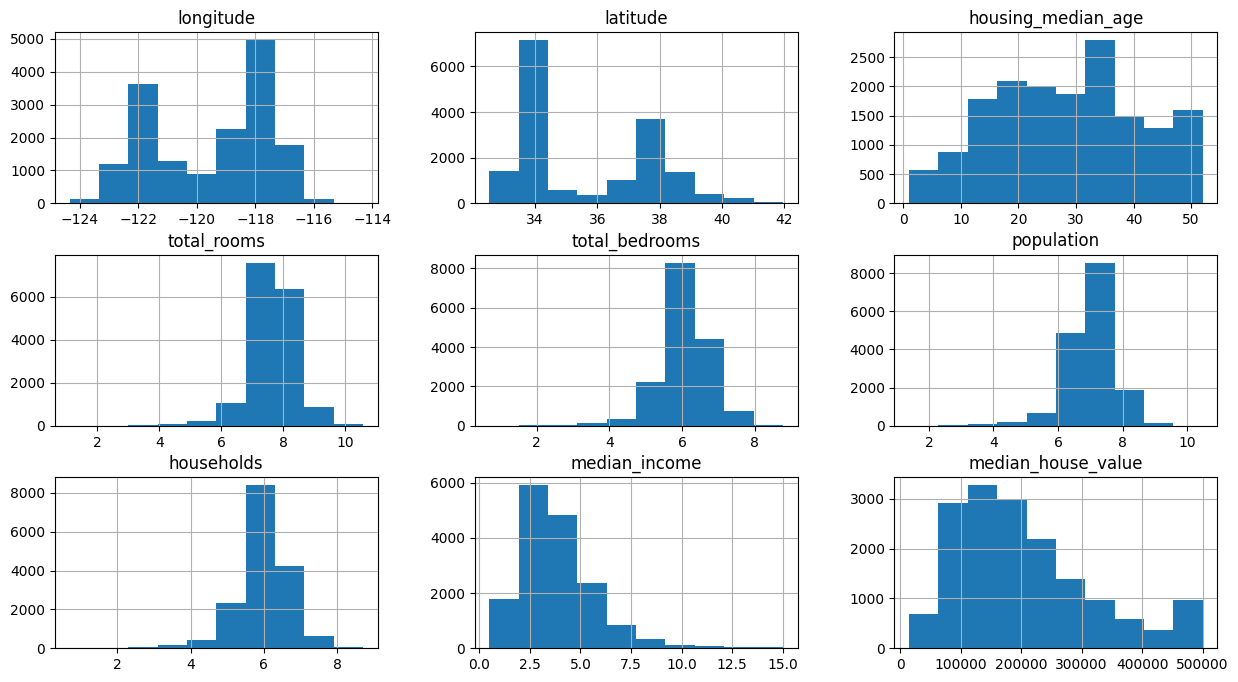

In [13]:
# This provides a histogram with better visualisations especially for total rooms, total bedrooms, and population.

train_data.hist(figsize=(15,8))

In [14]:
# Inserting dummies in the ocean_proximity parameters and dropping off the 'ocean_proximity' column.

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13927,-114.60,34.83,46.0,7.311886,5.736572,6.669498,5.605802,2.1908,48100.0,0,1,0,0,0
7942,-118.13,33.87,45.0,7.382124,5.707110,6.601230,5.690359,4.6765,198400.0,1,0,0,0,0
20048,-119.02,36.05,22.0,7.639642,6.068426,7.198184,6.124683,2.2202,65200.0,0,1,0,0,0
20196,-119.21,34.26,23.0,7.968320,6.293419,7.319202,6.251904,3.3452,217600.0,0,0,0,0,1
4910,-118.27,34.01,35.0,7.085064,5.874931,7.487174,5.834811,1.8652,116100.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19186,-122.66,38.46,14.0,7.768533,6.448889,7.170888,6.439350,2.6023,221100.0,1,0,0,0,0
14663,-117.12,32.80,29.0,7.959975,6.282267,7.239215,6.259581,3.8719,174200.0,0,0,0,0,1
18209,-122.06,37.40,21.0,9.461566,8.079308,8.892062,8.023880,4.3351,267400.0,0,0,0,1,0
3160,-118.92,35.13,29.0,7.168580,5.572154,6.813445,5.537334,1.9236,106300.0,0,1,0,0,0


<AxesSubplot: >

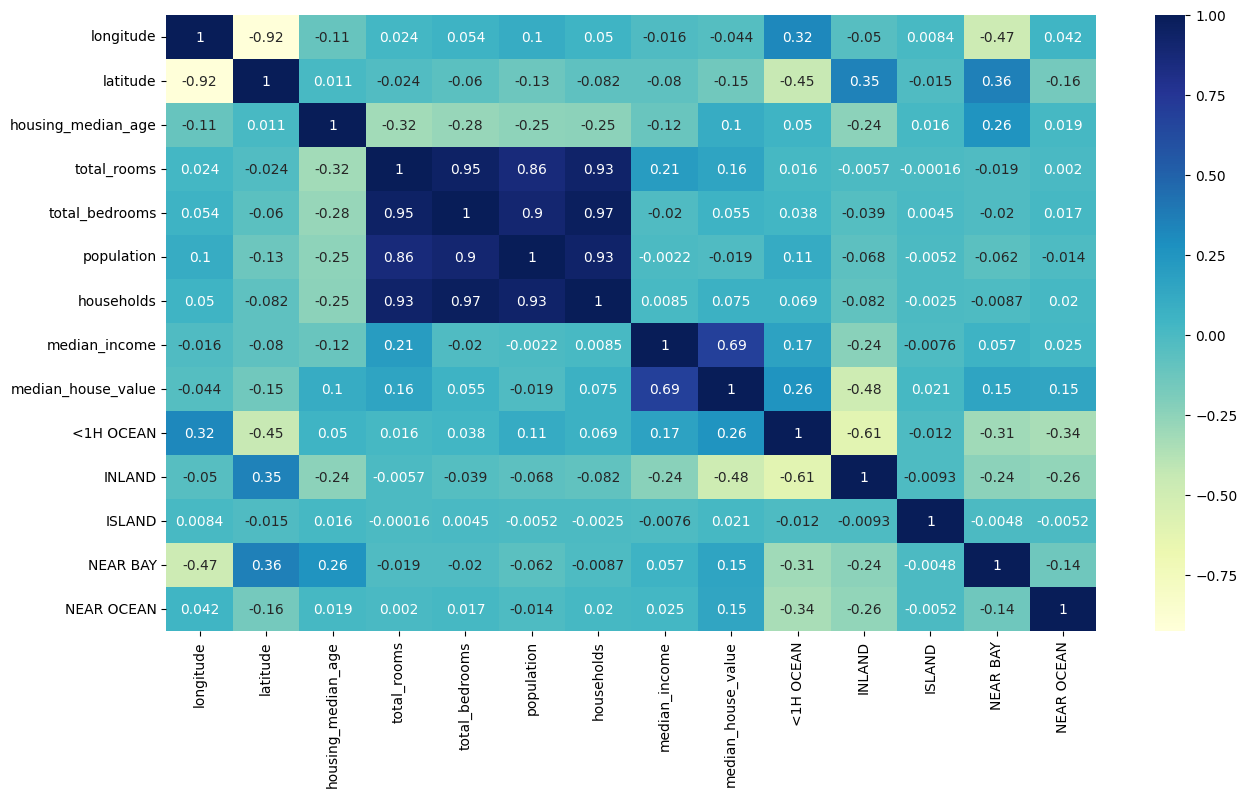

In [15]:
# returns a new heatmap with 'individual' ocean proximity features and dropping the entire 'ocean proximity' column.

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

From the heatmap above, we can observe that the median_house_value (target) exhibits a negative correlation with the feature "INLAND." This implies that if you purchase a house located inland, you can expect to pay a lower median price. Conversely, for houses situated within 1 hour of the ocean (<1H OCEAN), you can anticipate higher prices.

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

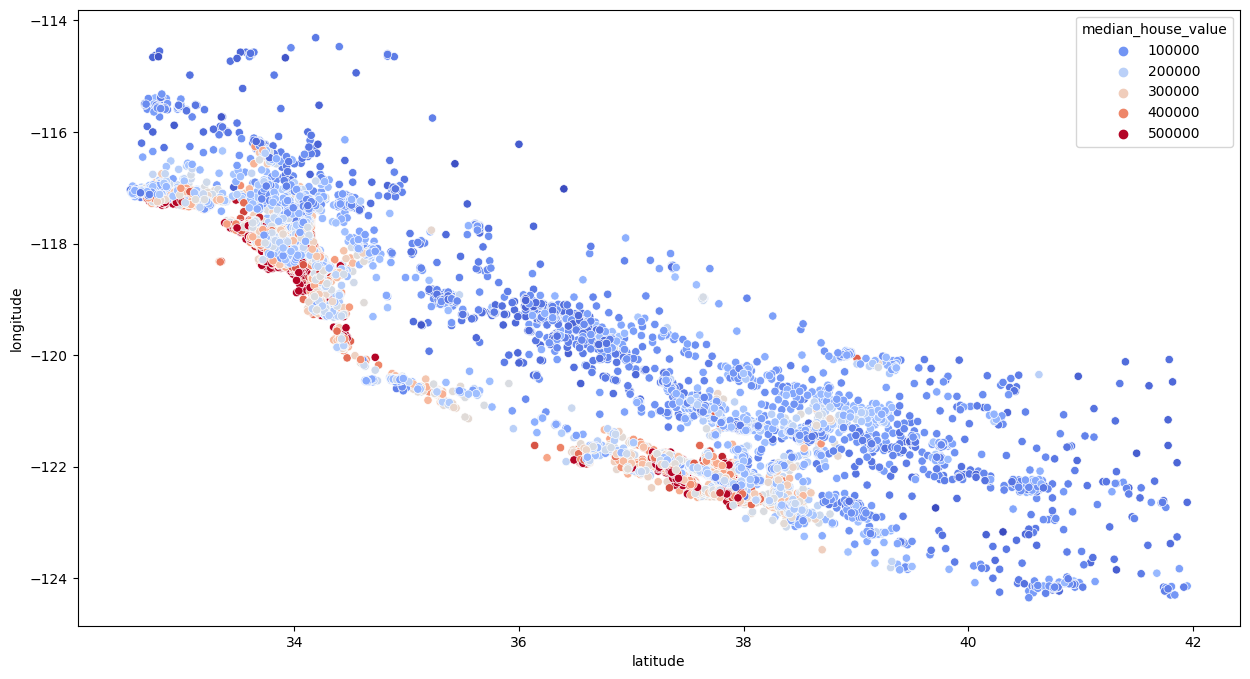

In [16]:
# returns a scatter plot showing price of houses based on location.

plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y ="longitude",data=train_data, hue ="median_house_value", palette ="coolwarm")

## Feature Engineering

In [17]:
# Getting the bedroom ratio and household rooms

train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot: >

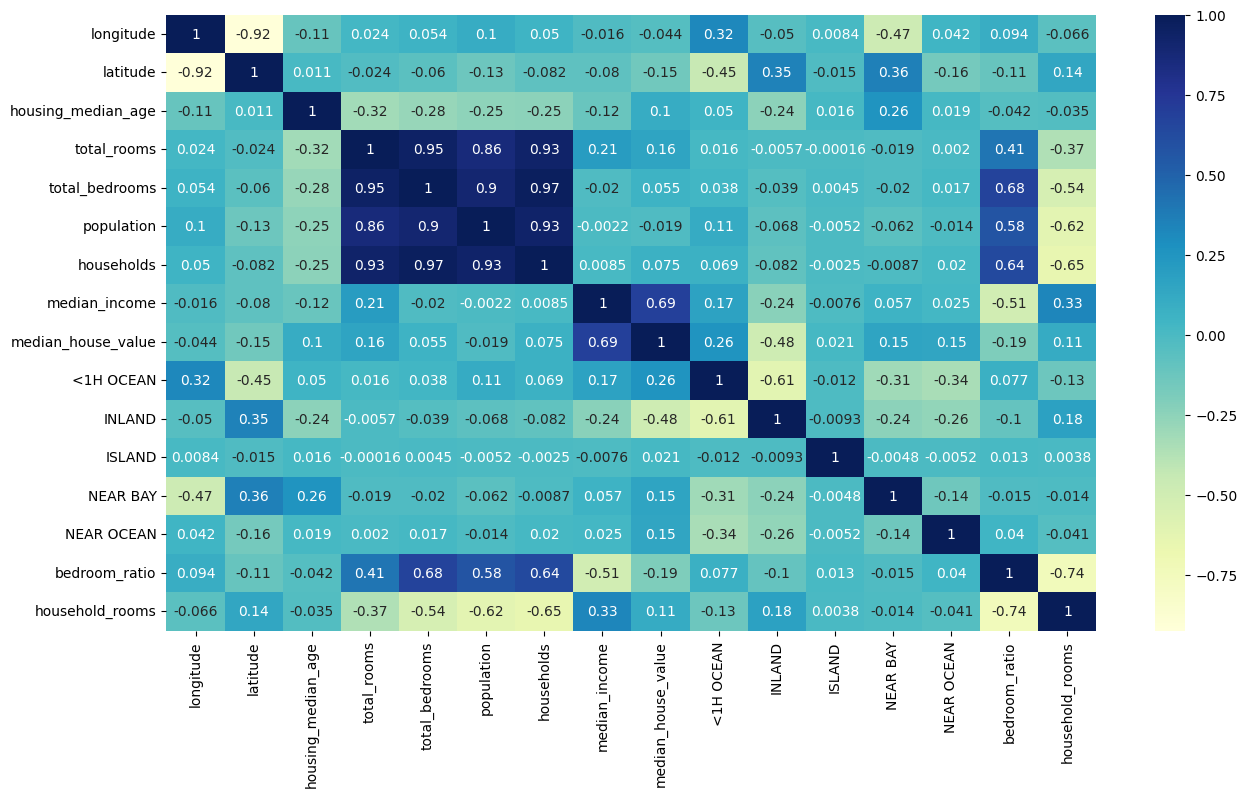

In [18]:
# shows a new correlation heatmap that includes new features

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

From the correlation heatmap above, we can observe a strong correlation between the number of household rooms and the total number of rooms, which significantly influences the value of the house. However, the correlation between the total number of bedrooms and the value of the house is not as significant and interesting.

## Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s,y_train)

LinearRegression()

In [20]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [21]:
X_test_s = scaler.transform(X_test)

In [22]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19029,-122.01,38.36,28.0,7.584773,5.755742,6.599870,5.676754,4.9583,146200.0,0,1,0,0,0,0.758855,1.336111
9979,-122.27,38.68,18.0,6.610696,4.962845,5.840642,4.787492,3.1563,98400.0,0,1,0,0,0,0.750730,1.380827
16390,-121.25,38.04,26.0,8.033009,6.161207,7.137278,6.144186,4.9861,201800.0,0,1,0,0,0,0.766986,1.307416
16912,-122.34,37.56,39.0,8.178358,5.971262,7.038784,5.971262,12.6417,500001.0,0,0,0,0,1,0.730130,1.369620
12090,-117.30,33.85,15.0,8.292048,6.622736,7.748460,6.489205,2.9542,127900.0,0,1,0,0,0,0.798685,1.277822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14955,-116.97,32.75,28.0,8.166216,6.369901,7.450661,6.381816,4.7973,186900.0,1,0,0,0,0,0.780031,1.279607
14315,-117.14,32.70,40.0,7.113142,5.802118,7.090077,5.758902,1.2188,92500.0,0,0,0,0,1,0.815690,1.235156
5647,-118.29,33.74,29.0,7.315884,6.021023,7.221836,5.968708,2.1473,195300.0,0,0,0,0,1,0.823007,1.225706
19201,-122.71,38.43,52.0,7.272398,5.786897,6.605298,5.758902,2.2262,129900.0,1,0,0,0,0,0.795734,1.262810


In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13927,-114.60,34.83,46.0,7.311886,5.736572,6.669498,5.605802,2.1908,48100.0,0,1,0,0,0,0.784554,1.304343
7942,-118.13,33.87,45.0,7.382124,5.707110,6.601230,5.690359,4.6765,198400.0,1,0,0,0,0,0.773099,1.297304
20048,-119.02,36.05,22.0,7.639642,6.068426,7.198184,6.124683,2.2202,65200.0,0,1,0,0,0,0.794334,1.247353
20196,-119.21,34.26,23.0,7.968320,6.293419,7.319202,6.251904,3.3452,217600.0,0,0,0,0,1,0.789805,1.274543
4910,-118.27,34.01,35.0,7.085064,5.874931,7.487174,5.834811,1.8652,116100.0,1,0,0,0,0,0.829199,1.214275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19186,-122.66,38.46,14.0,7.768533,6.448889,7.170888,6.439350,2.6023,221100.0,1,0,0,0,0,0.830130,1.206416
14663,-117.12,32.80,29.0,7.959975,6.282267,7.239215,6.259581,3.8719,174200.0,0,0,0,0,1,0.789232,1.271646
18209,-122.06,37.40,21.0,9.461566,8.079308,8.892062,8.023880,4.3351,267400.0,0,0,0,1,0,0.853908,1.179176
3160,-118.92,35.13,29.0,7.168580,5.572154,6.813445,5.537334,1.9236,106300.0,0,1,0,0,0,0.777302,1.294590


In [24]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13927,-114.60,34.83,46.0,7.311886,5.736572,6.669498,5.605802,2.1908,0,1,0,0,0,0.784554,1.304343
7942,-118.13,33.87,45.0,7.382124,5.707110,6.601230,5.690359,4.6765,1,0,0,0,0,0.773099,1.297304
20048,-119.02,36.05,22.0,7.639642,6.068426,7.198184,6.124683,2.2202,0,1,0,0,0,0.794334,1.247353
20196,-119.21,34.26,23.0,7.968320,6.293419,7.319202,6.251904,3.3452,0,0,0,0,1,0.789805,1.274543
4910,-118.27,34.01,35.0,7.085064,5.874931,7.487174,5.834811,1.8652,1,0,0,0,0,0.829199,1.214275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19186,-122.66,38.46,14.0,7.768533,6.448889,7.170888,6.439350,2.6023,1,0,0,0,0,0.830130,1.206416
14663,-117.12,32.80,29.0,7.959975,6.282267,7.239215,6.259581,3.8719,0,0,0,0,1,0.789232,1.271646
18209,-122.06,37.40,21.0,9.461566,8.079308,8.892062,8.023880,4.3351,0,0,0,1,0,0.853908,1.179176
3160,-118.92,35.13,29.0,7.168580,5.572154,6.813445,5.537334,1.9236,0,1,0,0,0,0.777302,1.294590


In [25]:
X_test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19029,-122.01,38.36,28.0,7.584773,5.755742,6.599870,5.676754,4.9583,0,1,0,0,0,0.758855,1.336111
9979,-122.27,38.68,18.0,6.610696,4.962845,5.840642,4.787492,3.1563,0,1,0,0,0,0.750730,1.380827
16390,-121.25,38.04,26.0,8.033009,6.161207,7.137278,6.144186,4.9861,0,1,0,0,0,0.766986,1.307416
16912,-122.34,37.56,39.0,8.178358,5.971262,7.038784,5.971262,12.6417,0,0,0,0,1,0.730130,1.369620
12090,-117.30,33.85,15.0,8.292048,6.622736,7.748460,6.489205,2.9542,0,1,0,0,0,0.798685,1.277822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14955,-116.97,32.75,28.0,8.166216,6.369901,7.450661,6.381816,4.7973,1,0,0,0,0,0.780031,1.279607
14315,-117.14,32.70,40.0,7.113142,5.802118,7.090077,5.758902,1.2188,0,0,0,0,1,0.815690,1.235156
5647,-118.29,33.74,29.0,7.315884,6.021023,7.221836,5.968708,2.1473,0,0,0,0,1,0.823007,1.225706
19201,-122.71,38.43,52.0,7.272398,5.786897,6.605298,5.758902,2.2262,1,0,0,0,0,0.795734,1.262810


In [26]:
y_train

13927     48100.0
7942     198400.0
20048     65200.0
20196    217600.0
4910     116100.0
           ...   
19186    221100.0
14663    174200.0
18209    267400.0
3160     106300.0
11554    240000.0
Name: median_house_value, Length: 16346, dtype: float64

In [27]:
y_test

19029    146200.0
9979      98400.0
16390    201800.0
16912    500001.0
12090    127900.0
           ...   
14955    186900.0
14315     92500.0
5647     195300.0
19201    129900.0
16502     97100.0
Name: median_house_value, Length: 4087, dtype: float64

In [28]:
 reg.score(X_test_s, y_test)

0.6737429531750443

## Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [30]:
forest.score(X_test_s,y_test)

0.821679484720699

In [31]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4 , 8]  
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
best_forest = grid_search.best_estimator_

In [33]:
best_forest.score(X_test_s, y_test)

0.821817554827617

We can see that Random Forest outperforms Linear Regression Model with a score of 82.18%.

















### End Remarks

• We started off with california housing price dataset with 20640 rows and 10 columns.

• Further we analysed correlation matrix and geospatial visualisation.

• Then we build our regression models and chose the best using Grid Search.

• Random Forest outperforms Linear Regression Model with a score of 82.18%.

• Overall, our model is satisfactory.
 